### Problem Statement 
A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

## Step1 - Launching

In [6]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dataset1=pd.read_csv("general_data.csv")


In [3]:
dataset1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
dataset1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Step 2 - Data Treatment:

In [5]:
dataset1.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
dataset1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [7]:
dataset1.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


## Step 3 – Univariate Analysis:

In [8]:
dataset3=dataset1[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].describe()
dataset3

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,65029.312925,2.694830,15.209524,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,47068.888559,2.498887,3.659108,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [9]:
dataset3=dataset1[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].median()
dataset3


Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [10]:
dataset3=dataset1[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].mode()
dataset3

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,3,23420,1.0,11,10.0,2,5,0,2


In [11]:
dataset3=dataset1[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].var()
dataset3

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [12]:
dataset3=dataset1[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].skew()
dataset3

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [13]:
dataset3=dataset1[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].kurt()
dataset3

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

### Inference from the analysis:

**Performing analysis with Boxplots and Scatterplots**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5bf6adf828>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5bf6adff28>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5bf6adf518>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bf6af3668>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bf6af39e8>],
 'means': []}

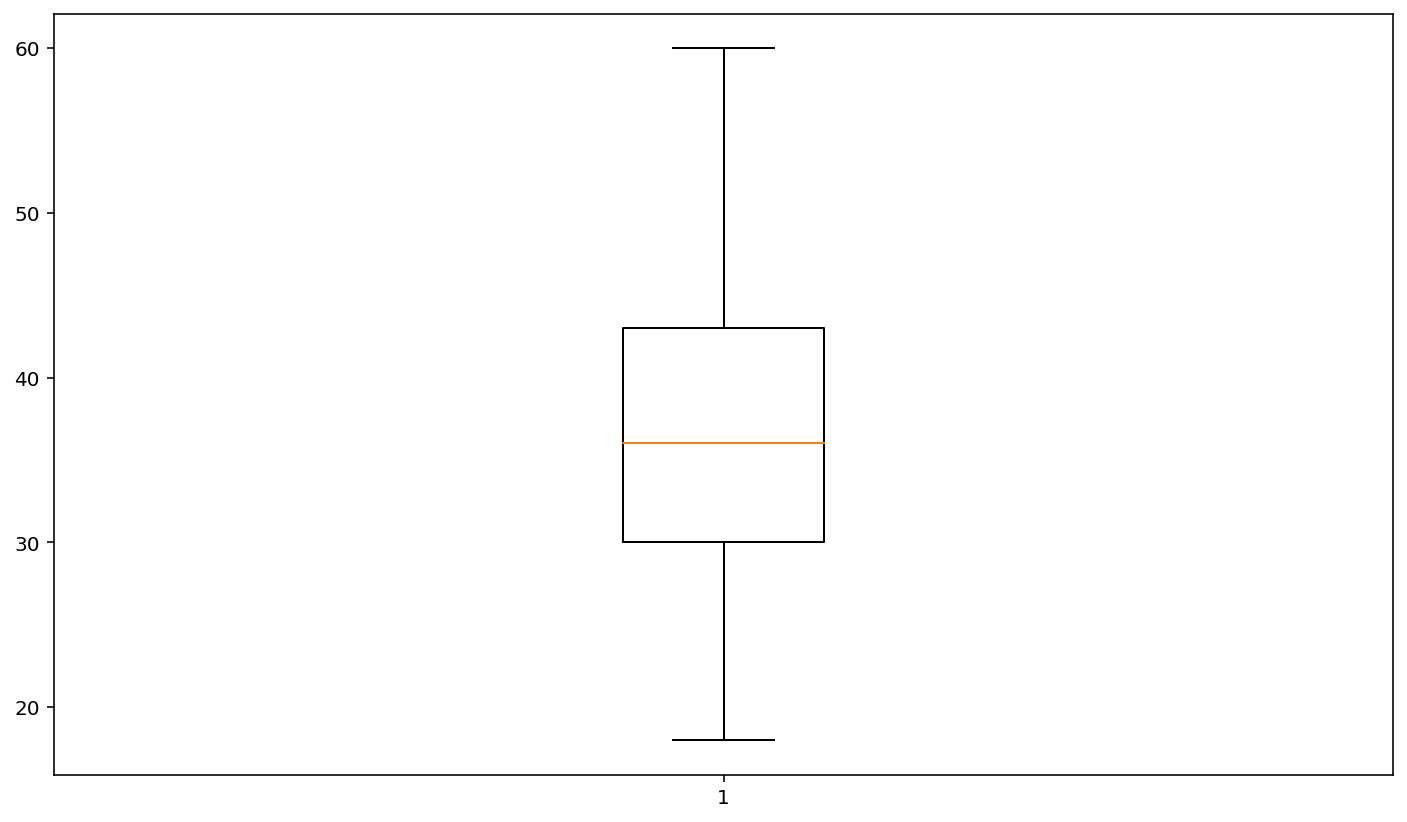

In [15]:
#Boxplot on Age column
box_plot = dataset1.Age
plt.boxplot(box_plot)

In [0]:
Age is normally distributed without any outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5bf665ec18>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5bf666e358>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5bf665e940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bf666ea58>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bf666edd8>],
 'means': []}

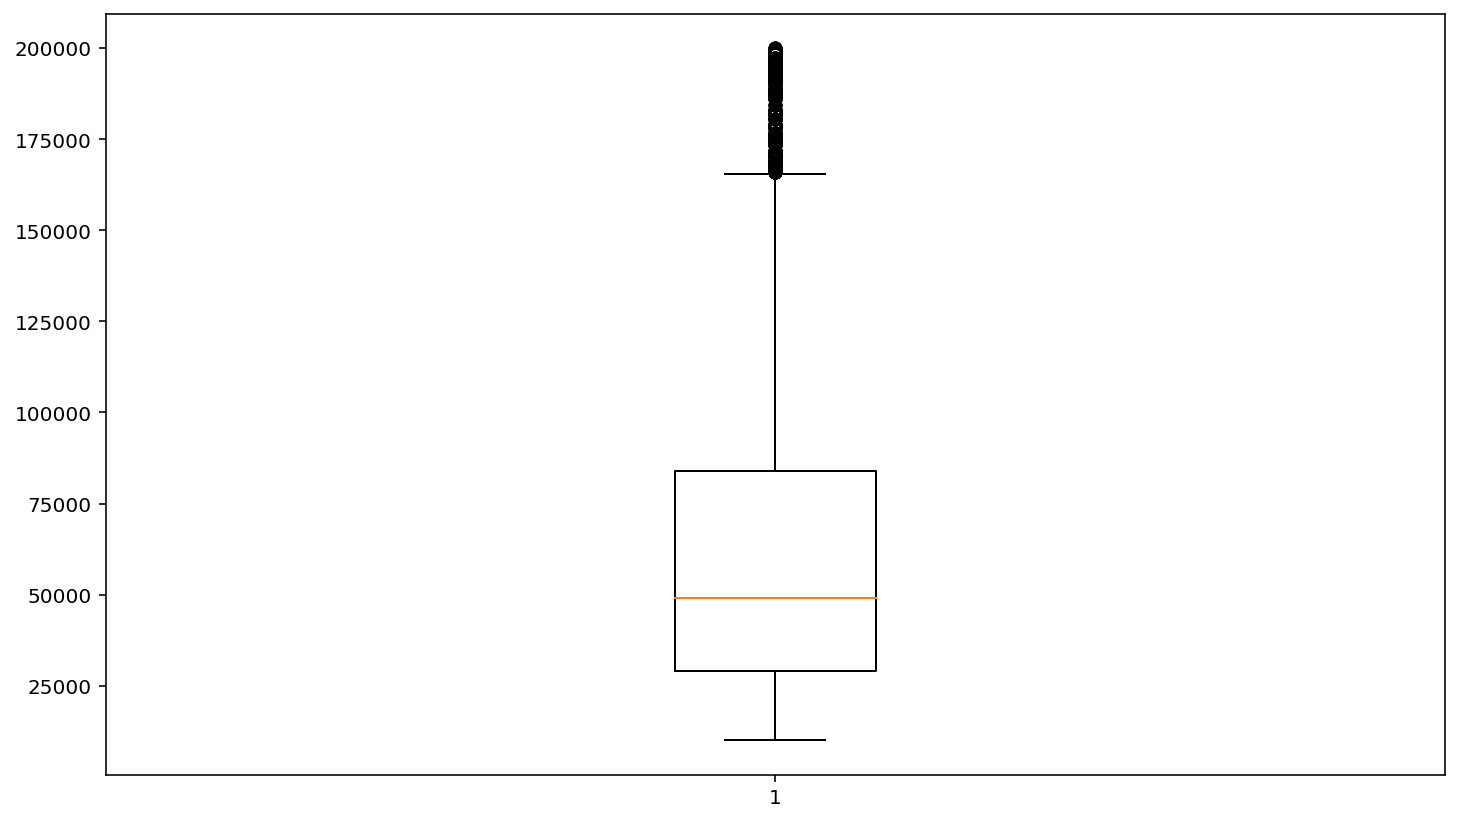

In [16]:
#Boxplot on Monthly income column
box_plot = dataset1.MonthlyIncome
plt.boxplot(box_plot)

In [0]:
Monthly Income is right skewed with several outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5bf65db128>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5bf65db828>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5bf664bdd8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bf65dbf28>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bf65e32e8>],
 'means': []}

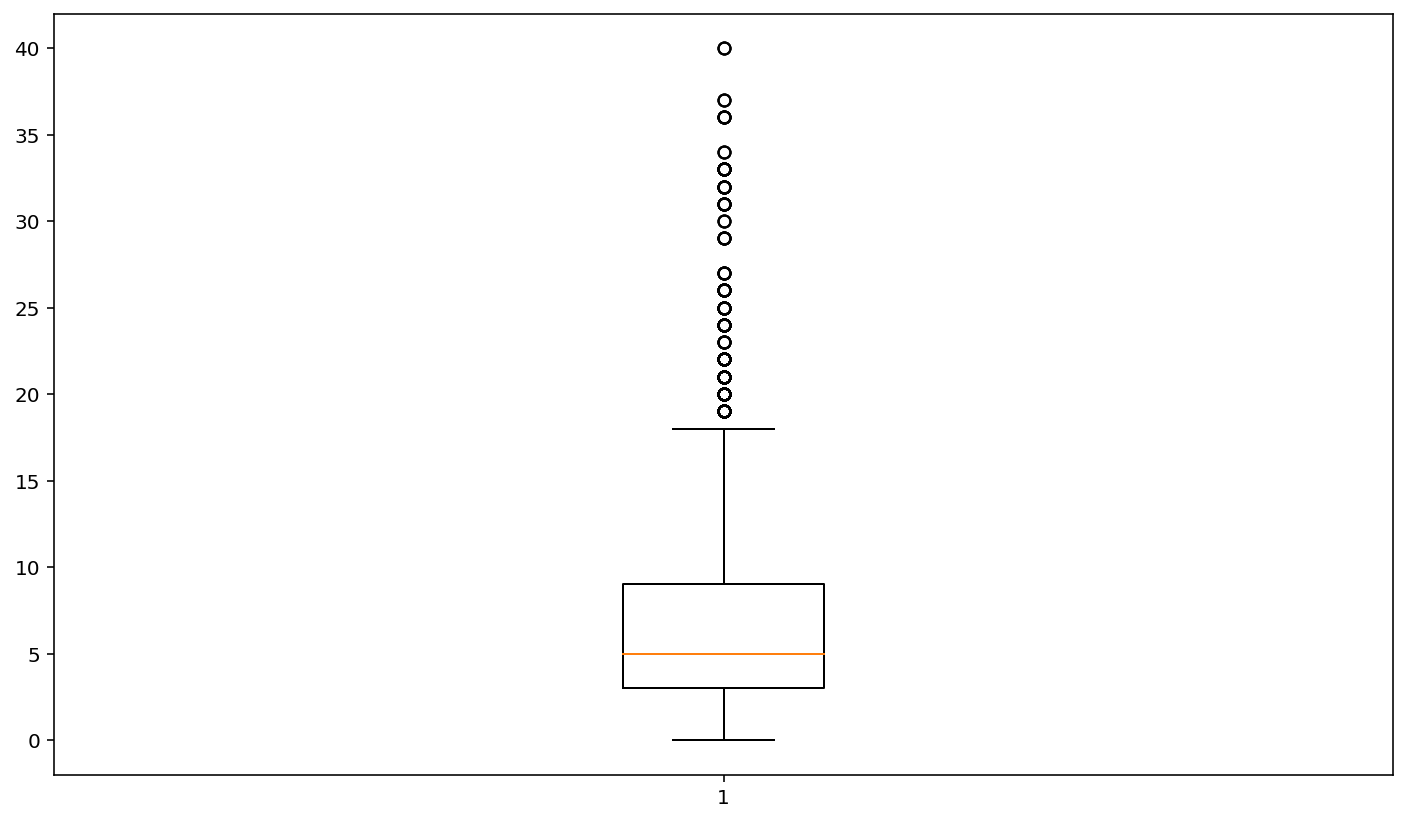

In [17]:
#Boxplot on Years at company column
box_plot = dataset1.YearsAtCompany
plt.boxplot(box_plot)

In [0]:
Years at company is also right skewed with several outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5bf6554be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5bf6563320>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5bf65548d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bf6563a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bf6563da0>],
 'means': []}

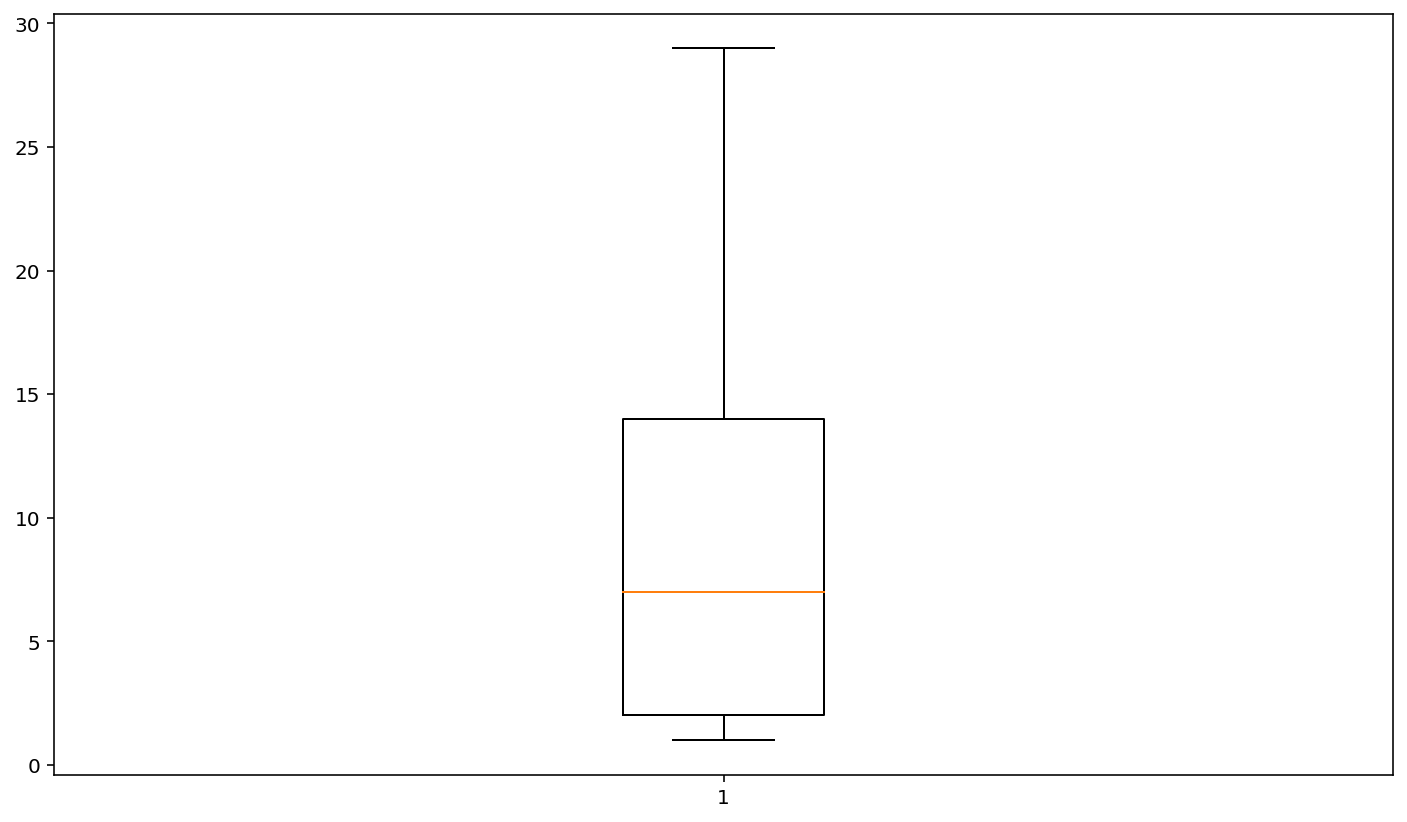

In [19]:
#Boxplot on Distance from home column
box_plot = dataset1.DistanceFromHome
plt.boxplot(box_plot)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5bf6538668>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5bf6538d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5bf6538358>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bf65454a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bf6545828>],
 'means': []}

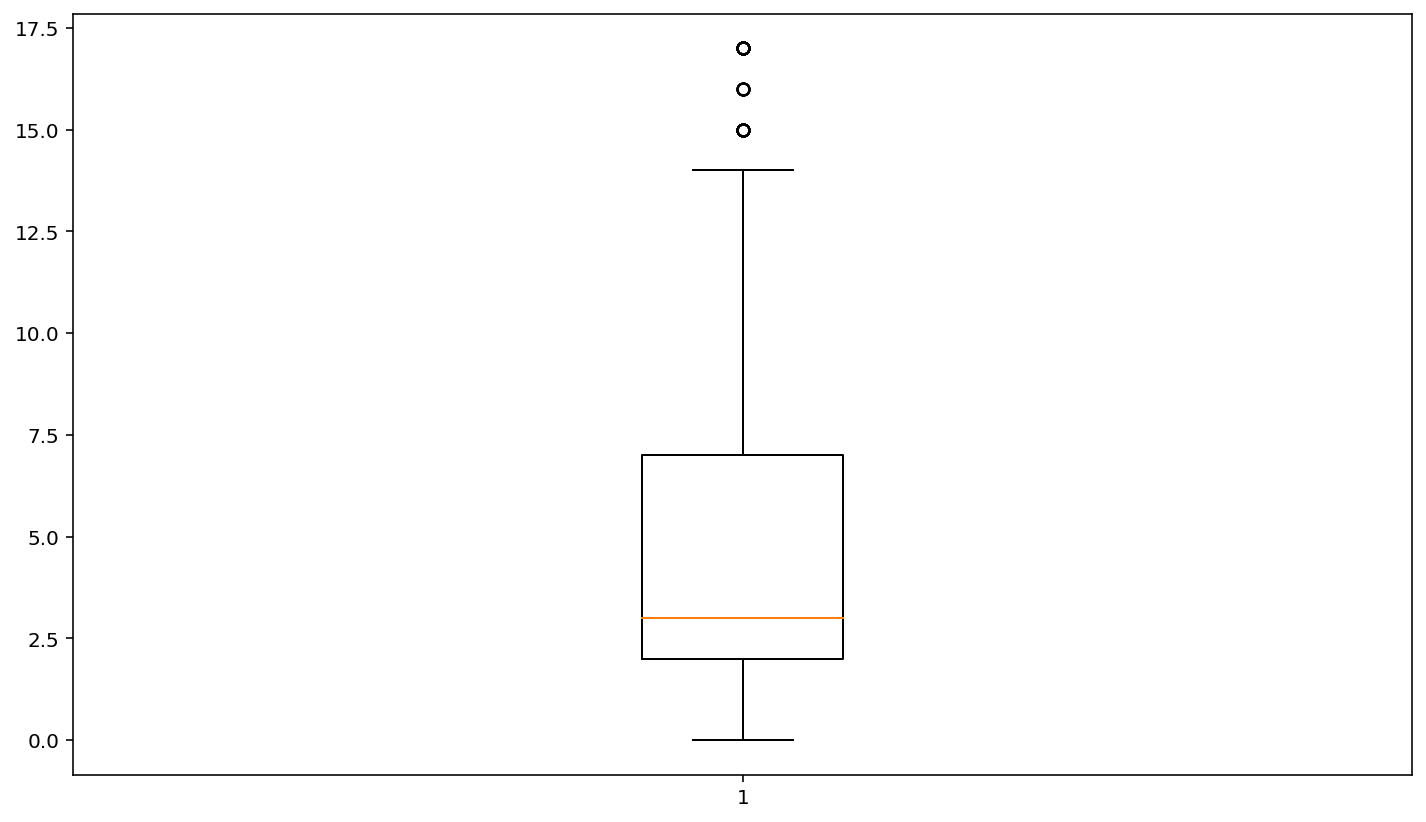

In [20]:
#Boxplot on Years with current manager column
box_plot = dataset1.YearsWithCurrManager
plt.boxplot(box_plot)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5bf641e748>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5bf641ee48>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5bf641e438>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bf642d588>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bf642d908>],
 'means': []}

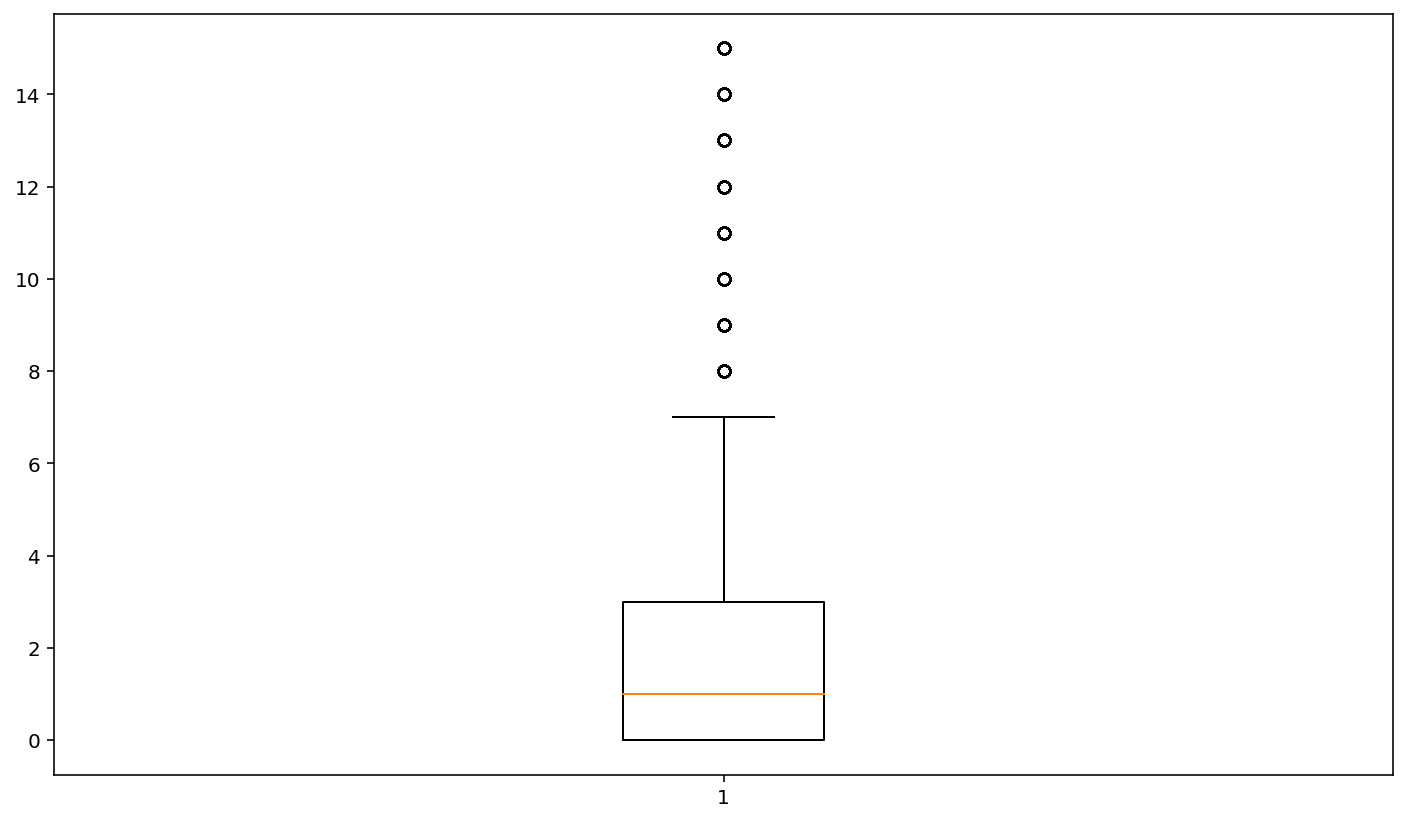

In [22]:
#Boxplot on Years since last promotion column
box_plot = dataset1.YearsSinceLastPromotion
plt.boxplot(box_plot)

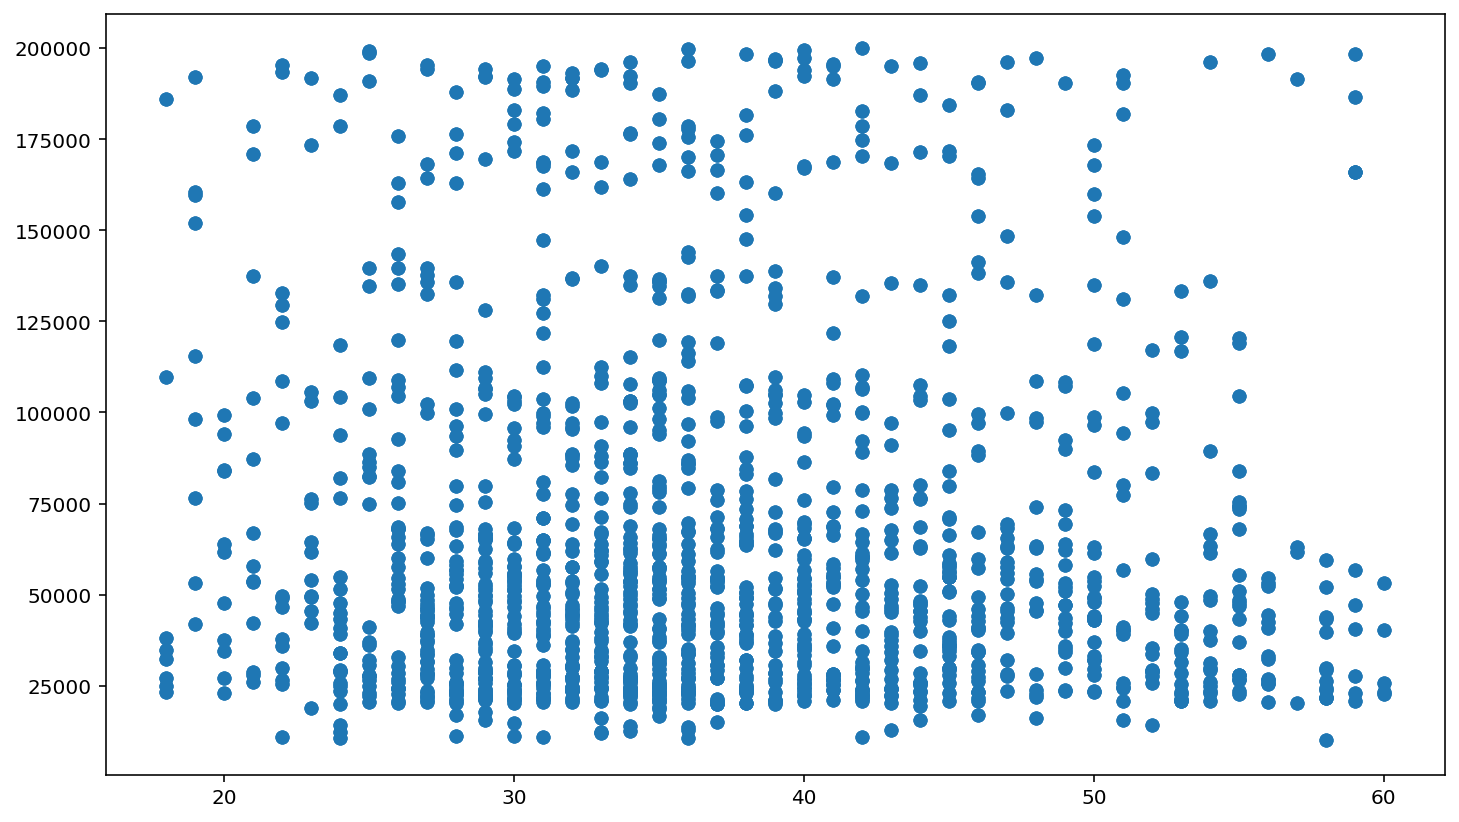

In [23]:
#Scatter plot between Age and Monthly Income
plt.scatter(dataset1.Age, dataset1.MonthlyIncome)

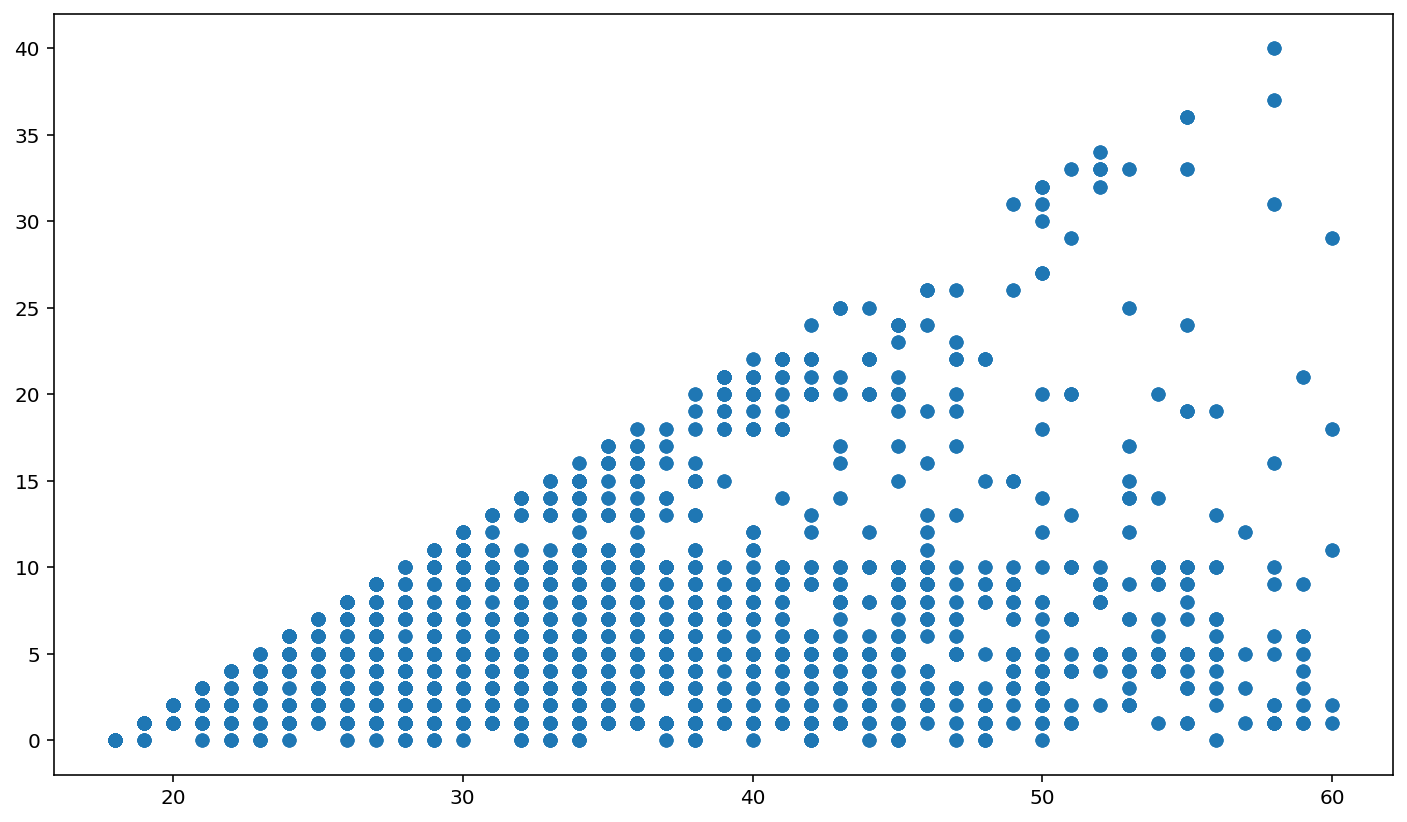

In [24]:
#Scatter plot between Age and Years at company
plt.scatter(dataset1.Age, dataset1.YearsAtCompany)

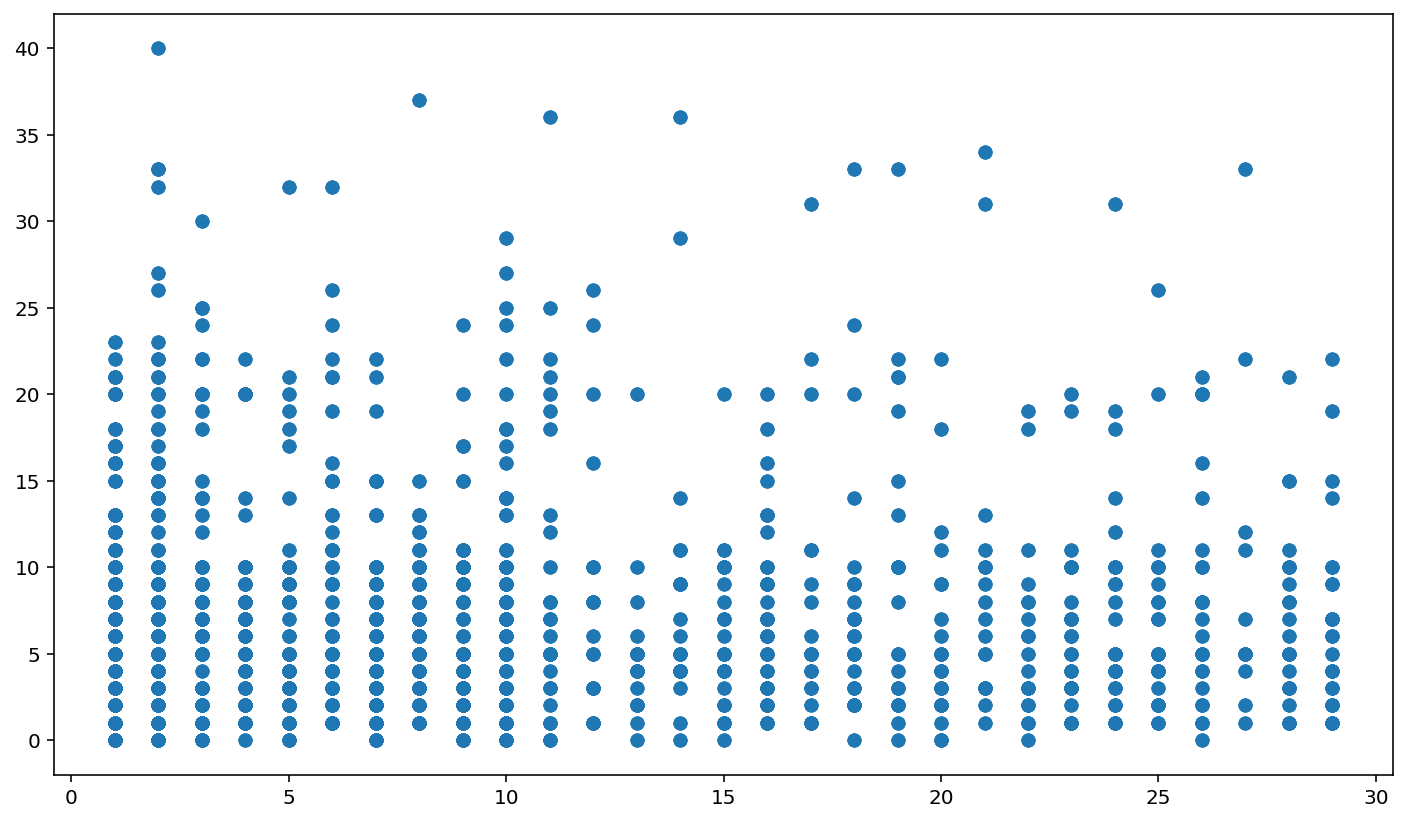

In [25]:
#Scatter plot between Age and Years at company
plt.scatter(dataset1.DistanceFromHome, dataset1.YearsAtCompany)

In [0]:
There’s no regression found while plotting on a scatter plot.

## Step 5 - Statistical Tests

In [11]:
dataset1["Attrition"]=dataset1["Attrition"].map({"Yes":1, "No":0})

In [12]:
dataset1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


## Mann-Whitney Test

In [8]:
from scipy.stats import mannwhitneyu

In [9]:
stats, p = mannwhitneyu(dataset1.Age,dataset1.DistanceFromHome)
print(stats,p)

255456.0 0.0


*Null Hypothesis: There is no Significant Difference between Age and DistanceFromHome*  
*Alternate Hypothesis: There is Significant Difference between Age and DistanceFromHome*  
*p value = 0.0*  
*P-Value < 0.05 hence Null Hypothesis is rejected, Accepting Alternate Hypothesis*
*There is no Significant Difference between Age and DistanceFromHome*

## Kruskal - Wallis Test

In [10]:
from scipy.stats import kruskal

In [11]:
stats, p = kruskal(dataset1.Attrition, dataset1.Education,dataset1.Age)
print(stats,p)

11959.880529572289 0.0


*Null Hypothesis: There is no Significant Difference between  Attrition , Education and Age*  
*Alternate Hypothesis: There is Significant Difference between  Attrition , Education and Age*  
*p value = 0.0*  
*P-Value < 0.05 hence Null Hypothesis is rejected, Accepting Alternate Hypothesis*
*There is no Significant Difference between  Attrition , Education and Age*

## Chi-sqaure Test

In [13]:
from scipy.stats import chi2_contingency

In [14]:
crosstable = pd.crosstab(dataset1.Gender,dataset1.JobLevel)
crosstable

JobLevel,1,2,3,4,5
Gender,,,,,
Female,621,669,243,138,93
Male,1008,933,411,180,114


In [15]:
stats, p, dof, expected = chi2_contingency(crosstable)
print(stats,p)

10.290012909944652 0.03581578139884318


*Null Hypothesis: There is no Significant Dependancy between  Gender and Job Level*  
*Alternate Hypothesis: There is Significant Dependancy between  Gender and Job Level*  
*p value = 0.03581578139884318*  
*P-Value < 0.05 hence Null Hypothesis is rejected, Accepting Alternate Hypothesis*
*There is no Significant Dependancy between  Gender and Job Level*

In [17]:
crosstable = pd.crosstab(dataset1.Gender,dataset1.Education)
crosstable

Education,1,2,3,4,5
Gender,,,,,
Female,180,351,705,462,66
Male,330,495,1011,732,78


In [18]:
stats, p, dof, expected = chi2_contingency(crosstable)
print(stats,p)

9.218745109415613 0.05585849364124916


*Null Hypothesis: There is no Significant Dependancy between  Gender and Education*  
*Alternate Hypothesis: There is Significant Dependancy between  Gender and Education*  
*p value = 0.05585849364124916*  
*P-Value > 0.05 hence Alternate Hypothesis is rejected, Accepting Null Hypothesis*
*There is no Significant Dependancy between  Gender and Education*

## Step 6 - Unsupervised Learning (Correlation Analysis)

In [4]:
from scipy.stats import pearsonr

**Correlation between Attrition and DistanceFromHome**


In [13]:
stats,p =pearsonr(dataset1.Attrition, dataset1.DistanceFromHome)
print(stats,p)

-0.009730141010179692 0.5182860428050771


*Null Hypothesis: There is no Significant Correlation between Attrition and DistanceFromHome*  
*Alternate Hypothesis: There is Significant Correlation between Attrition and DistanceFromHome*

*Correlation: -0.009730141010179692 P Value: 0.5182860428050771*

*P-Value >= 0.05 hence Null hypothesis is Accepted*
*There is no Significant Correlation between Attrition and DistanceFromHome*

**correlation between Attrition and Education**

In [14]:
stats,p =pearsonr(dataset1.Attrition, dataset1.Education)
print(stats,p)

-0.015111167710968721 0.3157293177118575


*Null Hypothesis: There is no Significant Correlation between Attrition and Education*  
*Alternate Hypothesis: There is Significant Correlation between Attrition and Education*

*Correlation: -0.015111167710968721 P Value: 0.3157293177118575*

*P-Value >= 0.05 hence Null hypothesis is Accepted*
*There is no Significant Correlation between Attrition and Education*

**correlation between Attrition and JobLevel**

In [15]:
stats,p =pearsonr(dataset1.Attrition, dataset1.JobLevel)
print(stats,p)

-0.010289713287494923 0.4945171727183978


*Null Hypothesis: There is no Significant Correlation between Attrition and JobLevel*  
*Alternate Hypothesis: There is Significant Correlation between Attrition and JobLevel*

*Correlation: -0.010289713287494923 P Value: 0.4945171727183978*

*P-Value >= 0.05 hence Null hypothesis is Accepted*
*There is no Significant Correlation between Attrition and JobLevel*

**correlation between Attrition and MonthlyIncome**

In [16]:
stats,p =pearsonr(dataset1.Attrition, dataset1.MonthlyIncome)
print(stats,p)

-0.03117628169811501 0.03842748490600132


*Null Hypothesis: There is no Significant Correlation between Attrition and MonthlyIncome*  
*Alternate Hypothesis: There is Significant Correlation between Attrition and MonthlyIncome*

*Correlation: -0.03117628169811501 P Value: 0.03842748490600132*

*P-Value < 0.05 hence Null Hypothesis is rejected, Accepting Alternate Hypothesis*
*There is Negative Correlation between Attrition and MonthlyIncome*

**correlation between Attrition and PercentSalaryHike**

In [17]:
stats,p =pearsonr(dataset1.Attrition, dataset1.PercentSalaryHike)
print(stats,p)

0.0325325948910535 0.030743386433355353


*Null Hypothesis: There is no Significant Correlation between Attrition and PercentSalaryHike*  
*Alternate Hypothesis: There is Significant Correlation between Attrition and PercentSalaryHike*

*Correlation: 0.0325325948910535 P Value: 0.030743386433355353* 

*P-Value < 0.05 hence Null Hypothesis is rejected, Accepting Alternate Hypothesis*
*There is Positive Correlation between Attrition and PercentSalaryHike*

**correlation between Attrition and StockOptionLevel**

In [19]:
stats,p =pearsonr(dataset1.Attrition, dataset1.StockOptionLevel)
print(stats,p)

-0.006838852403261526 0.6498072937475723


*Null Hypothesis: There is no Significant Correlation between Attrition and StockOptionLevel*  
*Alternate Hypothesis: There is Significant Correlation between Attrition and StockOptionLevel*

*Correlation: -0.006838852403261526 P Value: 0.6498072937475723*

*P-Value >= 0.05 hence Null hypothesis is Accepted*
*There is no Significant Correlation between Attrition and StockOptionLevel*

**correlation between Attrition and TrainingTimesLastYear**

In [21]:
stats,p =pearsonr(dataset1.Attrition, dataset1.TrainingTimesLastYear)
print(stats,p)

-0.049430576244254974 0.0010247061915365072


*Null Hypothesis: There is no Significant Correlation between Attrition and TrainingTimesLastYear*  
*Alternate Hypothesis: There is Significant Correlation between Attrition and TrainingTimesLastYear*

*Correlation: -0.049430576244254974 P Value: 0.0010247061915365072* 

*P-Value < 0.05 hence Null Hypothesis is rejected, Accepting Alternate Hypothesis*
There is Negative Correlation between Attrition and TrainingTimesLastYear*

**correlation between Attrition and YearsAtCompany**

In [23]:
stats,p =pearsonr(dataset1.Attrition, dataset1.YearsAtCompany)
print(stats,p)

-0.13439221398997717 3.1638831224877484e-19


*Null Hypothesis: There is no Significant Correlation between Attrition and YearsAtCompany*  
*Alternate Hypothesis: There is Significant Correlation between Attrition and YearsAtCompany*

*Correlation: -0.13439221398997717 P Value: 3.1638831224877484e-19* 

*P-Value < 0.05 hence Null Hypothesis is rejected, Accepting Alternate Hypothesis*
*There is Negative Correlation between Attrition and YearsAtCompany*

**correlation between Attrition and YearsSinceLastPromotion**

In [24]:
stats,p =pearsonr(dataset1.Attrition, dataset1.YearsSinceLastPromotion)
print(stats,p)

-0.03301877514258437 0.028330336189396753


*Null Hypothesis: There is no Significant Correlation between Attrition and YearsSinceLastPromotion*  
*Alternate Hypothesis: There is Significant Correlation between Attrition and YearsSinceLastPromotion*

*Correlation: -0.03301877514258437 P Value: 0.028330336189396753* 

*P-Value < 0.05 hence Null Hypothesis is rejected, Accepting Alternate Hypothesis*
*There is Negative Correlation between Attrition and YearsSinceLastPromotion*

**correlation between Attrition and YearsWithCurrManager**

In [25]:
stats,p =pearsonr(dataset1.Attrition, dataset1.YearsWithCurrManager)
print(stats,p)

-0.15619931590162806 1.7339322652900218e-25


*Null Hypothesis: There is no Significant Correlation between Attrition and YearsWithCurrManager*  
*Alternate Hypothesis: There is Significant Correlation between Attrition and YearsWithCurrManager*

*Correlation: -0.15619931590162806 P Value: 1.7339322652896276e-25* 

*P-Value < 0.05 hence Null Hypothesis is rejected, Accepting Alternate Hypothesis*
*There is Negative Correlation between Attrition and YearsWithCurrManager*

**Inference from above analysis**